In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [2]:
# load in datasets
conversion_new_load_import = "../ToGrade/Data_Sets/final_clean_imports.csv"
conversion_new_load_export = "../ToGrade/Data_Sets/final_clean_exports.csv"

# read in csv
new_import_df = pd.read_csv(conversion_new_load_import)
new_export_df = pd.read_csv(conversion_new_load_export)

# see if it works
new_import_df.head()

,Unnamed: 0,Unnamed: 0.1,Commodity,Country,UNIT_DESC,Year,AMOUNT,Metric Tons
0,0,30128,Beef,Argentina,KG,2006,137101.0,137.101
1,1,30129,Beef,Argentina,KG,2006,87009.0,87.009
2,2,30150,Beef,Argentina,KG,2006,9386.0,9.386
3,3,30151,Beef,Argentina,KG,2006,19475.0,19.475
4,4,30152,Beef,Argentina,KG,2006,122693.0,122.693


In [3]:
#group exports by country and year
summary_country_exports = new_export_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2010,1172034,41546741,4.027077e+06,103482.865695


In [4]:
#data munge and convert to percent change
summary_export_pivot = summary_country_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_export_pct = summary_export_pivot.pct_change()
summary_export_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [5]:
#group imports by country and year
summary_country_imports = new_import_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_imports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06
1,Argentina,2007,30083,17998645,1.715963e+08,6.316710e+06
2,Argentina,2008,45504,18750702,1.390987e+08,5.112003e+06
3,Argentina,2009,71905,21202413,1.087845e+08,3.992219e+06
4,Argentina,2010,72326,14458465,1.070546e+08,3.923230e+06


In [6]:
#data munge and convert to percent change
summary_import_pivot = summary_country_imports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_import_pct = summary_import_pivot.pct_change()
summary_import_pct

Country,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.009843,-0.492449,NaN,-0.610613,-0.488134,NaN,0.0,0.153532,2.081172,0.137898,NaN,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,NaN,0.0,-0.036204,-0.731545,-0.204057,NaN,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,NaN,0.0,-0.063439,-0.032049,0.135787,NaN,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,NaN,0.0,0.172179,-0.702514,0.464830,NaN,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,NaN,0.0,0.075216,-0.954303,0.373189,NaN,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,NaN,0.0,0.267775,16.869376,0.449106,NaN,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,NaN,0.0,0.036933,6.386284,-0.003730,NaN,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,NaN,0.0,0.140652,1.538943,0.227116,NaN,0.873080,0.106668


In [7]:
# convert Nan values to zero for whole dataframe
summary_import_pct = summary_import_pct.replace(np.nan, 0)
summary_import_pct

Country,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2007,-0.192718,0.009843,-0.492449,0.000000,-0.610613,-0.488134,0.0,0.0,0.153532,2.081172,0.137898,0.0,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,0.0,0.0,-0.036204,-0.731545,-0.204057,0.0,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,0.0,0.0,-0.063439,-0.032049,0.135787,0.0,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,0.0,0.0,0.172179,-0.702514,0.464830,0.0,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,0.0,0.0,0.075216,-0.954303,0.373189,0.0,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,0.0,0.0,0.267775,16.869376,0.449106,0.0,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,0.0,0.0,0.036933,6.386284,-0.003730,0.0,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,0.0,0.0,0.140652,1.538943,0.227116,0.0,0.873080,0.106668


In [8]:
# convert dataframe to give it a shorter, more concise name
total_export = pd.DataFrame(summary_export_pct, columns= ['Argentina', 'Australia', 'Bulgaria', 'China (Mainland)', 'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland', 'Saudi Arabia', 'Turkey', 'United Kingdom', 'Zambia'])
total_export

,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [9]:
# convert NaN values top zero for whole dataframe
total_export = total_export.replace(np.nan, 0)
total_export

,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,0.000000
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [10]:
# create new dataframe with a more concise name
total_import = pd.DataFrame(summary_import_pct, columns = ['Argentina', 'Australia', 'China (Mainland)', 'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland', 'United Kingdom'])
total_import

,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2007,-0.192718,0.009843,-0.492449,0.000000,-0.610613,-0.488134,0.0,0.0,0.153532,2.081172,0.137898,0.0,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,0.0,0.0,-0.036204,-0.731545,-0.204057,0.0,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,0.0,0.0,-0.063439,-0.032049,0.135787,0.0,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,0.0,0.0,0.172179,-0.702514,0.464830,0.0,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,0.0,0.0,0.075216,-0.954303,0.373189,0.0,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,0.0,0.0,0.267775,16.869376,0.449106,0.0,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,0.0,0.0,0.036933,6.386284,-0.003730,0.0,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,0.0,0.0,0.140652,1.538943,0.227116,0.0,0.873080,0.106668


In [11]:
# convert Nan values to zero for whole dataframe
total_import = total_import.replace(np.nan, 0)
total_import

,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2007,-0.192718,0.009843,-0.492449,0.000000,-0.610613,-0.488134,0.0,0.0,0.153532,2.081172,0.137898,0.0,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,0.0,0.0,-0.036204,-0.731545,-0.204057,0.0,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,0.0,0.0,-0.063439,-0.032049,0.135787,0.0,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,0.0,0.0,0.172179,-0.702514,0.464830,0.0,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,0.0,0.0,0.075216,-0.954303,0.373189,0.0,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,0.0,0.0,0.267775,16.869376,0.449106,0.0,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,0.0,0.0,0.036933,6.386284,-0.003730,0.0,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,0.0,0.0,0.140652,1.538943,0.227116,0.0,0.873080,0.106668


In [12]:
# break down total dataframe into individual country dataframe 
argentina_import = pd.DataFrame(total_import, columns = ['Argentina'])
argentina_import

,Argentina
Year,
2006,0.000000
2007,-0.192718
2008,-0.190718
2009,-0.219050
2010,-0.017281
2011,-0.025124
2012,-0.947309
2013,0.949274
2014,-0.551902


In [13]:
#change column name
argentina_import.rename(columns = {'Argentina':'Argentina/Import'}, inplace = True)
argentina_import

,Argentina/Import
Year,
2006,0.000000
2007,-0.192718
2008,-0.190718
2009,-0.219050
2010,-0.017281
2011,-0.025124
2012,-0.947309
2013,0.949274
2014,-0.551902


In [14]:
# break down total dataframe into individual country dataframe 
argentina_export = pd.DataFrame(total_export, columns = ['Argentina'])
argentina_export

,Argentina
Year,
2006,0.000000
2007,1.354372
2008,-0.465541
2009,-0.530791
2010,7.237706
2011,-0.146520
2012,-0.974728
2013,1.275118
2014,6.242104


In [15]:
# change column name
argentina_export.rename(columns = {'Argentina':'Argentina/Export'}, inplace = True)
argentina_export

,Argentina/Export
Year,
2006,0.000000
2007,1.354372
2008,-0.465541
2009,-0.530791
2010,7.237706
2011,-0.146520
2012,-0.974728
2013,1.275118
2014,6.242104


In [16]:
# Place the DataFrames side by side
argentina_ImportExport = pd.concat([argentina_import, argentina_export], axis=1)
argentina_ImportExport

,Argentina/Import,Argentina/Export
Year,,
2006,0.000000,0.000000
2007,-0.192718,1.354372
2008,-0.190718,-0.465541
2009,-0.219050,-0.530791
2010,-0.017281,7.237706
2011,-0.025124,-0.146520
2012,-0.947309,-0.974728
2013,0.949274,1.275118
2014,-0.551902,6.242104


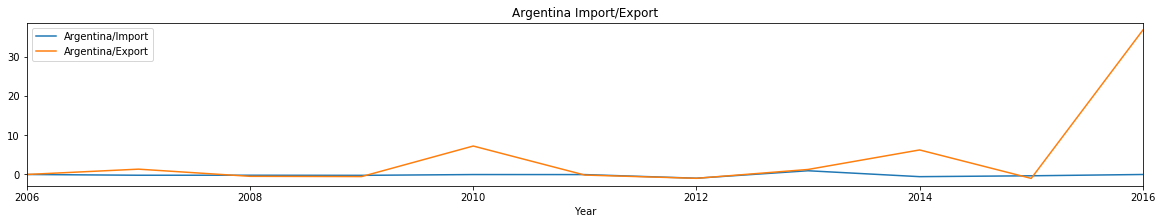

<Figure size 432x288 with 0 Axes>

In [17]:
# chart imports/exports for individual country
argentina_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Argentina Import/Export")
plt.savefig("../ImportsExportsGraphs/argentina_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [18]:
# break down total dataframe into individual country dataframe  
australia_import = pd.DataFrame(total_import, columns = ['Australia'])
australia_import

,Australia
Year,
2006,0.000000
2007,0.009843
2008,-0.242639
2009,0.162863
2010,-0.263164
2011,-0.172490
2012,0.366182
2013,-0.023424
2014,0.650670


In [19]:
# change the column name
australia_import.rename(columns = {'Australia':'Australia/Import'}, inplace = True)
australia_import

,Australia/Import
Year,
2006,0.000000
2007,0.009843
2008,-0.242639
2009,0.162863
2010,-0.263164
2011,-0.172490
2012,0.366182
2013,-0.023424
2014,0.650670


In [20]:
# break down total dataframe into individual country dataframe
australia_export = pd.DataFrame(total_export, columns = ['Australia'])
australia_export

,Australia
Year,
2006,0.000000
2007,0.155372
2008,0.402362
2009,0.178960
2010,0.170893
2011,0.272214
2012,0.070008
2013,-0.170253
2014,-0.082296


In [21]:
# change the column name
australia_export.rename(columns = {'Australia':'Australia/Export'}, inplace = True)
australia_export

,Australia/Export
Year,
2006,0.000000
2007,0.155372
2008,0.402362
2009,0.178960
2010,0.170893
2011,0.272214
2012,0.070008
2013,-0.170253
2014,-0.082296


In [22]:
# Place the DataFrames side by side
australia_ImportExport = pd.concat([australia_import, australia_export], axis=1)
australia_ImportExport

,Australia/Import,Australia/Export
Year,,
2006,0.000000,0.000000
2007,0.009843,0.155372
2008,-0.242639,0.402362
2009,0.162863,0.178960
2010,-0.263164,0.170893
2011,-0.172490,0.272214
2012,0.366182,0.070008
2013,-0.023424,-0.170253
2014,0.650670,-0.082296


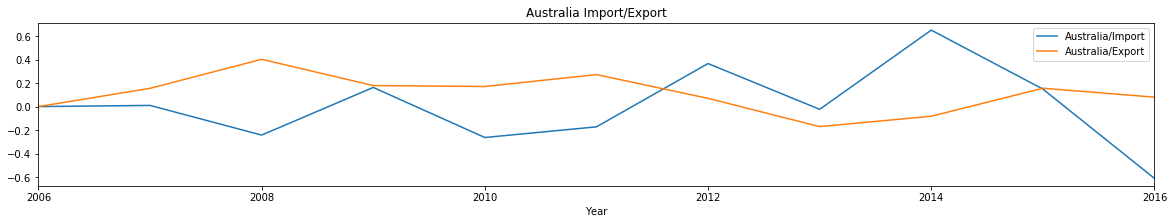

<Figure size 432x288 with 0 Axes>

In [23]:
# graph the imports/exports for individual country
australia_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Australia Import/Export")
plt.savefig("../ImportsExportsGraphs/australia_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [24]:
# break down total dataframe into individual country dataframe
china_import = pd.DataFrame(total_import, columns = ['China (Mainland)'])
china_import

,China (Mainland)
Year,
2006,0.000000
2007,-0.492449
2008,1.357808
2009,-0.601025
2010,0.107886
2011,0.074418
2012,0.063481
2013,-0.262903
2014,2.381967


In [25]:
# change the column name
china_import.rename(columns = {'China (Mainland)':'China/Import'}, inplace = True)
china_import

,China/Import
Year,
2006,0.000000
2007,-0.492449
2008,1.357808
2009,-0.601025
2010,0.107886
2011,0.074418
2012,0.063481
2013,-0.262903
2014,2.381967


In [26]:
# break down total dataframe into individual country dataframe 
china_export = pd.DataFrame(total_export, columns = ['China (Mainland)'])
china_export

,China (Mainland)
Year,
2006,0.000000
2007,0.397168
2008,0.265514
2009,-0.286323
2010,-0.585284
2011,1.554098
2012,0.050441
2013,-0.078777
2014,-0.260055


In [27]:
# change the column name
china_export.rename(columns = {'China (Mainland)':'China/Export'}, inplace = True)
china_export

,China/Export
Year,
2006,0.000000
2007,0.397168
2008,0.265514
2009,-0.286323
2010,-0.585284
2011,1.554098
2012,0.050441
2013,-0.078777
2014,-0.260055


In [28]:
# Place the DataFrames side by side
china_ImportExport = pd.concat([china_import, china_export], axis=1)
china_ImportExport

,China/Import,China/Export
Year,,
2006,0.000000,0.000000
2007,-0.492449,0.397168
2008,1.357808,0.265514
2009,-0.601025,-0.286323
2010,0.107886,-0.585284
2011,0.074418,1.554098
2012,0.063481,0.050441
2013,-0.262903,-0.078777
2014,2.381967,-0.260055


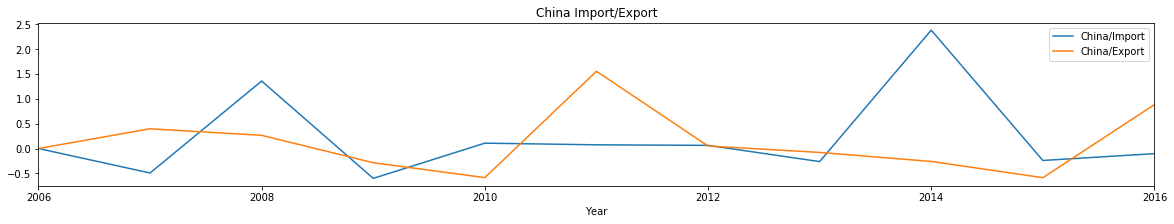

<Figure size 432x288 with 0 Axes>

In [29]:
# graph to show imports/exports for individual country
china_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("China Import/Export")
plt.savefig("../ImportsExportsGraphs/china_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [30]:
# break down total dataframe into individual country dataframe 
colombia_import = pd.DataFrame(total_import, columns = ['Colombia'])
colombia_import

,Colombia
Year,
2006,0.000000
2007,0.000000
2008,0.000000
2009,0.000000
2010,-0.997630
2011,0.000000
2012,636.053437
2013,0.000000
2014,0.000000


In [31]:
# change the column name
colombia_import.rename(columns = {'Colombia':'Colombia/Import'}, inplace = True)
colombia_import

,Colombia/Import
Year,
2006,0.000000
2007,0.000000
2008,0.000000
2009,0.000000
2010,-0.997630
2011,0.000000
2012,636.053437
2013,0.000000
2014,0.000000


In [32]:
# break down total dataframe into individual country dataframe  
colombia_export = pd.DataFrame(total_export, columns = ['Colombia'])
colombia_export

,Colombia
Year,
2006,0.000000
2007,0.088714
2008,0.070145
2009,0.156915
2010,0.345242
2011,0.050647
2012,0.315799
2013,0.436060
2014,0.209983


In [33]:
# change the column name
colombia_export.rename(columns = {'Colombia':'Colombia/Export'}, inplace = True)
colombia_export

,Colombia/Export
Year,
2006,0.000000
2007,0.088714
2008,0.070145
2009,0.156915
2010,0.345242
2011,0.050647
2012,0.315799
2013,0.436060
2014,0.209983


In [34]:
# Place the DataFrames side by side
colombia_ImportExport = pd.concat([colombia_import, colombia_export], axis=1)
colombia_ImportExport

,Colombia/Import,Colombia/Export
Year,,
2006,0.000000,0.000000
2007,0.000000,0.088714
2008,0.000000,0.070145
2009,0.000000,0.156915
2010,-0.997630,0.345242
2011,0.000000,0.050647
2012,636.053437,0.315799
2013,0.000000,0.436060
2014,0.000000,0.209983


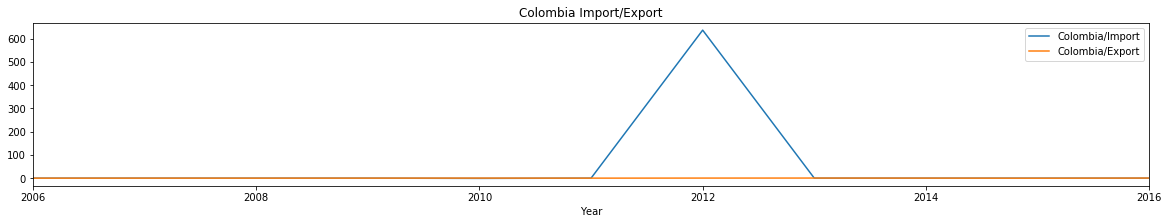

<Figure size 432x288 with 0 Axes>

In [35]:
# graph to show imports/exports for individual countries
colombia_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Colombia Import/Export")
plt.savefig("../ImportsExportsGraphs/colombia_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [36]:
# break down total dataframe into individual country dataframe 
france_import = pd.DataFrame(total_import, columns = ['France'])
france_import

,France
Year,
2006,0.000000
2007,-0.610613
2008,5.876003
2009,-0.455420
2010,1.085058
2011,-0.113016
2012,1.640965
2013,-0.349474
2014,0.312964


In [37]:
# change the column name
france_import.rename(columns = {'France':'France/Import'}, inplace = True)
france_import

,France/Import
Year,
2006,0.000000
2007,-0.610613
2008,5.876003
2009,-0.455420
2010,1.085058
2011,-0.113016
2012,1.640965
2013,-0.349474
2014,0.312964


In [38]:
# break down total dataframe into individual country dataframe
france_export = pd.DataFrame(total_export, columns = ['France'])
france_export

,France
Year,
2006,0.000000
2007,7.715077
2008,0.742227
2009,-0.934719
2010,3.305647
2011,-0.188302
2012,-0.658896
2013,-0.725995
2014,0.334797


In [39]:
# change the column name
france_export.rename(columns = {'France':'France/Export'}, inplace = True)
france_export

,France/Export
Year,
2006,0.000000
2007,7.715077
2008,0.742227
2009,-0.934719
2010,3.305647
2011,-0.188302
2012,-0.658896
2013,-0.725995
2014,0.334797


In [40]:
# Place the DataFrames side by side
france_ImportExport = pd.concat([france_import, france_export], axis=1)
france_ImportExport

,France/Import,France/Export
Year,,
2006,0.000000,0.000000
2007,-0.610613,7.715077
2008,5.876003,0.742227
2009,-0.455420,-0.934719
2010,1.085058,3.305647
2011,-0.113016,-0.188302
2012,1.640965,-0.658896
2013,-0.349474,-0.725995
2014,0.312964,0.334797


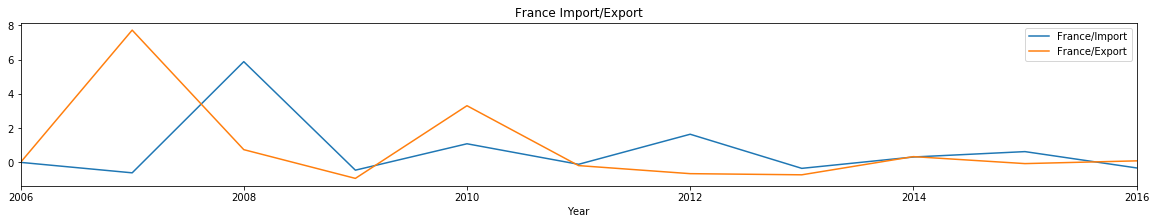

<Figure size 432x288 with 0 Axes>

In [41]:
# graph to show imports/exports for individual country
france_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("France Import/Export")
plt.savefig("../ImportsExportsGraphs/france_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [42]:
# break down total dataframe into individual country dataframe 
germany_import = pd.DataFrame(total_import, columns = ['Germany, Fed. Republic'])
germany_import

,"Germany, Fed. Republic"
Year,
2006,0.000000
2007,-0.488134
2008,-0.022143
2009,0.194351
2010,0.161526
2011,0.300321
2012,-0.124193
2013,0.172456
2014,0.426241


In [43]:
# change the column name
germany_import.rename(columns = {'Germany, Fed. Republic':'Germany/Import'}, inplace = True)
germany_import

,Germany/Import
Year,
2006,0.000000
2007,-0.488134
2008,-0.022143
2009,0.194351
2010,0.161526
2011,0.300321
2012,-0.124193
2013,0.172456
2014,0.426241


In [44]:
# break down total dataframe into individual country dataframe
germany_export = pd.DataFrame(total_export, columns = ['Germany, Fed. Republic'])
germany_export

,"Germany, Fed. Republic"
Year,
2006,0.000000
2007,0.673492
2008,0.796156
2009,-0.437523
2010,0.411062
2011,0.350359
2012,-0.075530
2013,-0.006613
2014,-0.149035


In [45]:
# change the column name
germany_export.rename(columns = {'Germany, Fed. Republic':'Germany/Export'}, inplace = True)
germany_export

,Germany/Export
Year,
2006,0.000000
2007,0.673492
2008,0.796156
2009,-0.437523
2010,0.411062
2011,0.350359
2012,-0.075530
2013,-0.006613
2014,-0.149035


In [46]:
# Place the DataFrames side by side
germany_ImportExport = pd.concat([germany_import, germany_export], axis=1)
germany_ImportExport

,Germany/Import,Germany/Export
Year,,
2006,0.000000,0.000000
2007,-0.488134,0.673492
2008,-0.022143,0.796156
2009,0.194351,-0.437523
2010,0.161526,0.411062
2011,0.300321,0.350359
2012,-0.124193,-0.075530
2013,0.172456,-0.006613
2014,0.426241,-0.149035


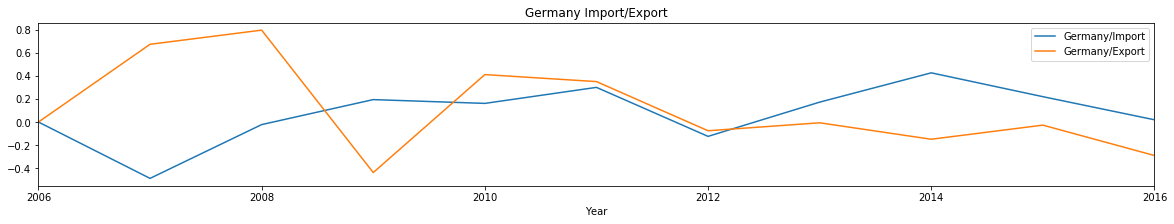

<Figure size 432x288 with 0 Axes>

In [47]:
# graph to show imports/exports for individual country
germany_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Germany Import/Export")
plt.savefig("../ImportsExportsGraphs/germany_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [48]:
# break down total dataframe into individual country dataframe 
greece_import = pd.DataFrame(total_import, columns = ['Greece'])
greece_import

,Greece
Year,
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


In [49]:
# change the column name
greece_import.rename(columns = {'Greece':'Greece/Import'}, inplace = True)
greece_import

,Greece/Import
Year,
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


In [50]:
# break down total dataframe into individual country dataframe 
greece_export = pd.DataFrame(total_export, columns = ['Greece'])
greece_export

,Greece
Year,
2006,0.000000
2007,0.036201
2008,-0.244641
2009,0.327192
2010,-0.502216
2011,-0.471370
2012,-0.428098
2013,-0.395518
2014,-0.583463


In [51]:
# change the column name
greece_export.rename(columns = {'Greece':'Greece/Export'}, inplace = True)
greece_export

,Greece/Export
Year,
2006,0.000000
2007,0.036201
2008,-0.244641
2009,0.327192
2010,-0.502216
2011,-0.471370
2012,-0.428098
2013,-0.395518
2014,-0.583463


In [52]:
# Place the DataFrames side by side
greece_ImportExport = pd.concat([greece_import, greece_export], axis=1)
greece_ImportExport

,Greece/Import,Greece/Export
Year,,
2006,0.0,0.000000
2007,0.0,0.036201
2008,0.0,-0.244641
2009,0.0,0.327192
2010,0.0,-0.502216
2011,0.0,-0.471370
2012,0.0,-0.428098
2013,0.0,-0.395518
2014,0.0,-0.583463


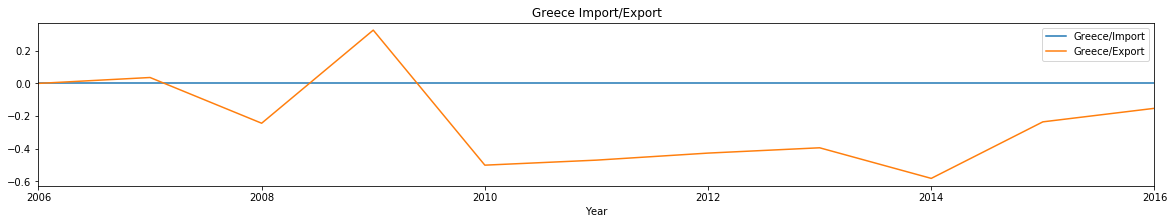

<Figure size 432x288 with 0 Axes>

In [53]:
# graph to show imports/exports for individual country
greece_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Greece Import/Export")
plt.savefig("../ImportsExportsGraphs/greece_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [54]:
# break down total dataframe into individual country dataframe 
india_import = pd.DataFrame(total_import, columns = ['India'])
india_import

,India
Year,
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


In [55]:
# change the column name
india_import.rename(columns = {'India':'India/Import'}, inplace = True)
india_import

,India/Import
Year,
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


In [56]:
# break down total dataframe into individual country dataframe 
india_export = pd.DataFrame(total_export, columns = ['India'])
india_export

,India
Year,
2006,0.000000
2007,14.925406
2008,2.696898
2009,-0.169952
2010,1.145758
2011,-0.754158
2012,-0.555460
2013,-0.106173
2014,-0.707755


In [57]:
# change the column name
india_export.rename(columns = {'India':'India/Export'}, inplace = True)
india_export

,India/Export
Year,
2006,0.000000
2007,14.925406
2008,2.696898
2009,-0.169952
2010,1.145758
2011,-0.754158
2012,-0.555460
2013,-0.106173
2014,-0.707755


In [58]:
# Place the DataFrames side by side
india_ImportExport = pd.concat([india_import, india_export], axis=1)
india_ImportExport

,India/Import,India/Export
Year,,
2006,0.0,0.000000
2007,0.0,14.925406
2008,0.0,2.696898
2009,0.0,-0.169952
2010,0.0,1.145758
2011,0.0,-0.754158
2012,0.0,-0.555460
2013,0.0,-0.106173
2014,0.0,-0.707755


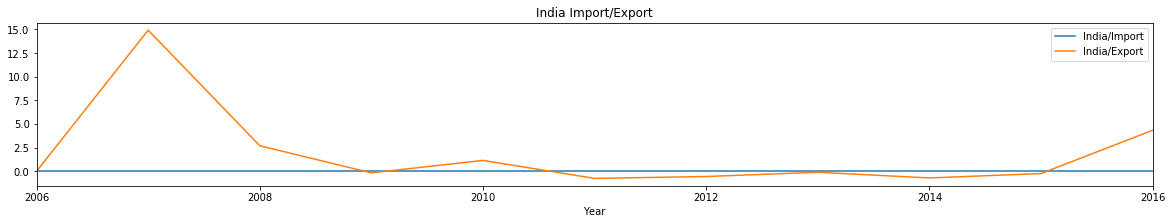

<Figure size 432x288 with 0 Axes>

In [59]:
# graph to show imports/exports for individual country
india_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("India Import/Export")
plt.savefig("../ImportsExportsGraphs/india_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [60]:
# break down total dataframe into individual country dataframe 
italy_import = pd.DataFrame(total_import, columns = ['Italy'])
italy_import

,Italy
Year,
2006,0.000000
2007,0.153532
2008,-0.036204
2009,-0.063439
2010,0.172179
2011,0.075216
2012,0.267775
2013,0.036933
2014,0.140652


In [61]:
# change the column name
italy_import.rename(columns = {'Italy':'Italy/Import'}, inplace = True)
italy_import

,Italy/Import
Year,
2006,0.000000
2007,0.153532
2008,-0.036204
2009,-0.063439
2010,0.172179
2011,0.075216
2012,0.267775
2013,0.036933
2014,0.140652


In [62]:
# break down total dataframe into individual country dataframe 
italy_export = pd.DataFrame(total_export, columns = ['Italy'])
italy_export

,Italy
Year,
2006,0.000000
2007,2.997971
2008,0.858240
2009,-0.453163
2010,1.159862
2011,0.153127
2012,-0.256049
2013,0.146907
2014,0.004773


In [63]:
# change the column name
italy_export.rename(columns = {'Italy':'Italy/Export'}, inplace = True)
italy_export

,Italy/Export
Year,
2006,0.000000
2007,2.997971
2008,0.858240
2009,-0.453163
2010,1.159862
2011,0.153127
2012,-0.256049
2013,0.146907
2014,0.004773


In [64]:
# Place the DataFrames side by side
italy_ImportExport = pd.concat([italy_import, italy_export], axis=1)
italy_ImportExport

,Italy/Import,Italy/Export
Year,,
2006,0.000000,0.000000
2007,0.153532,2.997971
2008,-0.036204,0.858240
2009,-0.063439,-0.453163
2010,0.172179,1.159862
2011,0.075216,0.153127
2012,0.267775,-0.256049
2013,0.036933,0.146907
2014,0.140652,0.004773


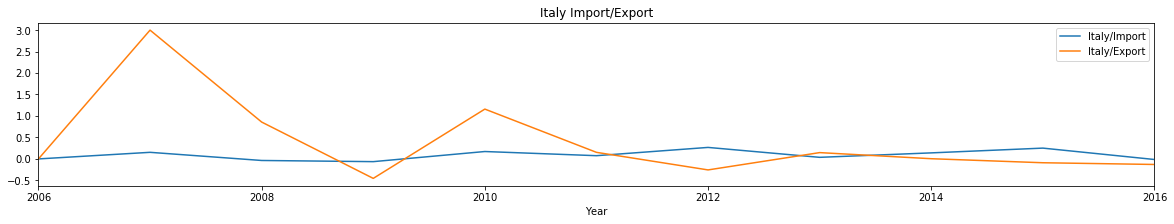

<Figure size 432x288 with 0 Axes>

In [65]:
# graph to show imports/exports for individual country
italy_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Italy Import/Export")
plt.savefig("../ImportsExportsGraphs/italy_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [66]:
# break down total dataframe into individual country dataframe 
japan_import = pd.DataFrame(total_import, columns = ['Japan'])
japan_import

,Japan
Year,
2006,0.000000
2007,2.081172
2008,-0.731545
2009,-0.032049
2010,-0.702514
2011,-0.954303
2012,16.869376
2013,6.386284
2014,1.538943


In [67]:
# change the column name
japan_import.rename(columns = {'Japan':'Japan/Import'}, inplace = True)
japan_import

,Japan/Import
Year,
2006,0.000000
2007,2.081172
2008,-0.731545
2009,-0.032049
2010,-0.702514
2011,-0.954303
2012,16.869376
2013,6.386284
2014,1.538943


In [68]:
# break down total dataframe into individual country dataframe
japan_export = pd.DataFrame(total_export, columns = ['Japan'])
japan_export

,Japan
Year,
2006,0.000000
2007,0.139340
2008,0.261100
2009,-0.026362
2010,0.092121
2011,0.200512
2012,-0.088123
2013,0.090205
2014,0.067333


In [69]:
# change the column name
japan_export.rename(columns = {'Japan':'Japan/Export'}, inplace = True)
japan_export

,Japan/Export
Year,
2006,0.000000
2007,0.139340
2008,0.261100
2009,-0.026362
2010,0.092121
2011,0.200512
2012,-0.088123
2013,0.090205
2014,0.067333


In [70]:
# Place the DataFrames side by side
japan_ImportExport = pd.concat([japan_import, japan_export], axis=1)
japan_ImportExport

,Japan/Import,Japan/Export
Year,,
2006,0.000000,0.000000
2007,2.081172,0.139340
2008,-0.731545,0.261100
2009,-0.032049,-0.026362
2010,-0.702514,0.092121
2011,-0.954303,0.200512
2012,16.869376,-0.088123
2013,6.386284,0.090205
2014,1.538943,0.067333


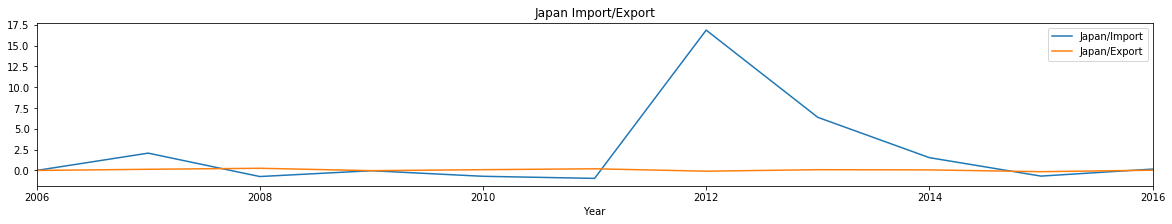

<Figure size 432x288 with 0 Axes>

In [71]:
# graph to show import/export for individual country
japan_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Japan Import/Export")
plt.savefig("../ImportsExportsGraphs/japan_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [72]:
# break down total dataframe into individual country dataframe 
mexico_import = pd.DataFrame(total_import, columns = ['Mexico'])
mexico_import

,Mexico
Year,
2006,0.000000
2007,0.137898
2008,-0.204057
2009,0.135787
2010,0.464830
2011,0.373189
2012,0.449106
2013,-0.003730
2014,0.227116


In [73]:
# change the column name
mexico_import.rename(columns = {'Mexico':'Mexico/Import'}, inplace = True)
mexico_import

,Mexico/Import
Year,
2006,0.000000
2007,0.137898
2008,-0.204057
2009,0.135787
2010,0.464830
2011,0.373189
2012,0.449106
2013,-0.003730
2014,0.227116


In [74]:
# break down total dataframe into individual country dataframe 
mexico_export = pd.DataFrame(total_export, columns = ['Mexico'])
mexico_export

,Mexico
Year,
2006,0.000000
2007,-0.099973
2008,0.288673
2009,0.057995
2010,0.084402
2011,0.042643
2012,0.081000
2013,0.098957
2014,0.115166


In [75]:
# change the column name
mexico_export.rename(columns = {'Mexico':'Mexico/Export'}, inplace = True)
mexico_export

,Mexico/Export
Year,
2006,0.000000
2007,-0.099973
2008,0.288673
2009,0.057995
2010,0.084402
2011,0.042643
2012,0.081000
2013,0.098957
2014,0.115166


In [76]:
# Place the DataFrames side by side
mexico_ImportExport = pd.concat([mexico_import, mexico_export], axis=1)
mexico_ImportExport

,Mexico/Import,Mexico/Export
Year,,
2006,0.000000,0.000000
2007,0.137898,-0.099973
2008,-0.204057,0.288673
2009,0.135787,0.057995
2010,0.464830,0.084402
2011,0.373189,0.042643
2012,0.449106,0.081000
2013,-0.003730,0.098957
2014,0.227116,0.115166


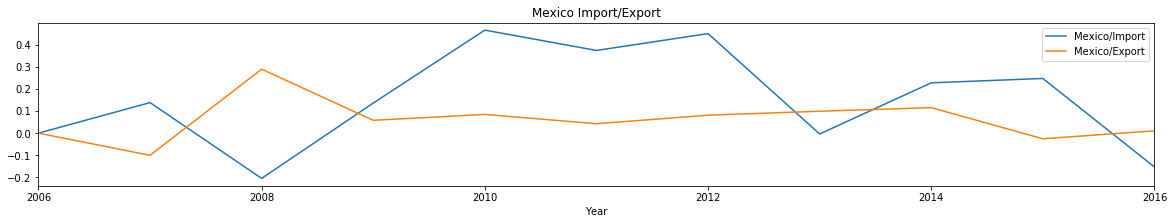

<Figure size 432x288 with 0 Axes>

In [77]:
# graph to show imports/exports for individual country
mexico_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Mexico Import/Export")
plt.savefig("../ImportsExportsGraphs/mexico_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [78]:
# break down total dataframe into individual country dataframe 
peru_import = pd.DataFrame(total_import, columns = ['Peru'])
peru_import

,Peru
Year,
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


In [79]:
# change column name
peru_import.rename(columns = {'Peru':'Peru/Import'}, inplace = True)
peru_import

,Peru/Import
Year,
2006,0.0
2007,0.0
2008,0.0
2009,0.0
2010,0.0
2011,0.0
2012,0.0
2013,0.0
2014,0.0


In [80]:
# break down total dataframe into individual country dataframe 
peru_export = pd.DataFrame(total_export, columns = ['Peru'])
peru_export

,Peru
Year,
2006,0.000000
2007,1.481479
2008,-0.284967
2009,3.114113
2010,1.172260
2011,-0.093562
2012,0.658122
2013,0.138995
2014,-0.113501


In [81]:
# change the column name
peru_export.rename(columns = {'Peru':'Peru/Export'}, inplace = True)
peru_export

,Peru/Export
Year,
2006,0.000000
2007,1.481479
2008,-0.284967
2009,3.114113
2010,1.172260
2011,-0.093562
2012,0.658122
2013,0.138995
2014,-0.113501


In [82]:
# Place the DataFrames side by side
peru_ImportExport = pd.concat([peru_import, peru_export], axis=1)
peru_ImportExport

,Peru/Import,Peru/Export
Year,,
2006,0.0,0.000000
2007,0.0,1.481479
2008,0.0,-0.284967
2009,0.0,3.114113
2010,0.0,1.172260
2011,0.0,-0.093562
2012,0.0,0.658122
2013,0.0,0.138995
2014,0.0,-0.113501


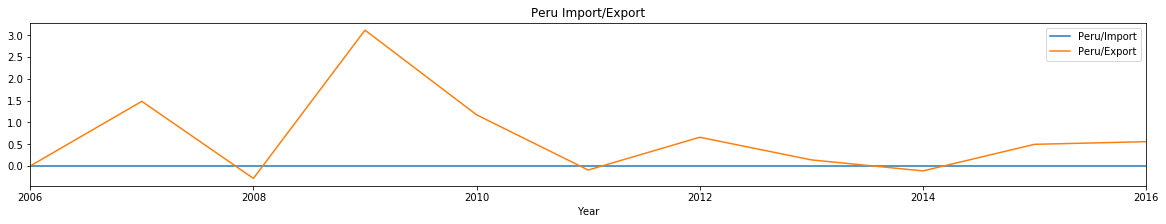

<Figure size 432x288 with 0 Axes>

In [83]:
# graph to show imports/exports for individual country
peru_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Peru Import/Export")
plt.savefig("../ImportsExportsGraphs/peru_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [84]:
# break down total dataframe into individual country dataframe 
poland_import = pd.DataFrame(total_import, columns = ['Poland'])
poland_import

,Poland
Year,
2006,0.000000
2007,0.154928
2008,0.005786
2009,-0.040746
2010,0.127193
2011,-0.083048
2012,0.075659
2013,0.166616
2014,0.873080


In [85]:
# change column name
poland_import.rename(columns = {'Poland':'Poland/Import'}, inplace = True)
poland_import

,Poland/Import
Year,
2006,0.000000
2007,0.154928
2008,0.005786
2009,-0.040746
2010,0.127193
2011,-0.083048
2012,0.075659
2013,0.166616
2014,0.873080


In [86]:
# break down total dataframe into individual country dataframe 
poland_export = pd.DataFrame(total_export, columns = ['Poland'])
poland_export

,Poland
Year,
2006,0.000000
2007,-0.854084
2008,-0.137801
2009,-0.088459
2010,-0.871491
2011,-0.964851
2012,-0.978682
2013,-0.472821
2014,0.000000


In [87]:
# change column name
poland_export.rename(columns = {'Poland':'Poland/Export'}, inplace = True)
poland_export

,Poland/Export
Year,
2006,0.000000
2007,-0.854084
2008,-0.137801
2009,-0.088459
2010,-0.871491
2011,-0.964851
2012,-0.978682
2013,-0.472821
2014,0.000000


In [88]:
# Place the DataFrames side by side
poland_ImportExport = pd.concat([poland_import, poland_export], axis=1)
poland_ImportExport

,Poland/Import,Poland/Export
Year,,
2006,0.000000,0.000000
2007,0.154928,-0.854084
2008,0.005786,-0.137801
2009,-0.040746,-0.088459
2010,0.127193,-0.871491
2011,-0.083048,-0.964851
2012,0.075659,-0.978682
2013,0.166616,-0.472821
2014,0.873080,0.000000


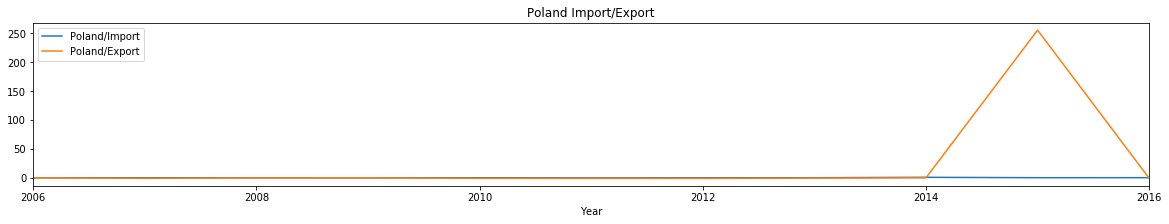

<Figure size 432x288 with 0 Axes>

In [89]:
# graph to show imports/exports for individual country
poland_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("Poland Import/Export")
plt.savefig("../ImportsExportsGraphs/poland_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()

In [90]:
# break down total dataframe into individual country dataframe 
uk_import = pd.DataFrame(total_import, columns = ['United Kingdom'])
uk_import

,United Kingdom
Year,
2006,0.000000
2007,0.082090
2008,-0.013669
2009,0.264801
2010,0.022107
2011,0.051416
2012,0.188516
2013,0.274949
2014,0.106668


In [91]:
# change column name
uk_import.rename(columns = {'United Kingdom':'UK/Import'}, inplace = True)
uk_import

,UK/Import
Year,
2006,0.000000
2007,0.082090
2008,-0.013669
2009,0.264801
2010,0.022107
2011,0.051416
2012,0.188516
2013,0.274949
2014,0.106668


In [92]:
# break down total dataframe into individual country dataframe 
uk_export = pd.DataFrame(total_export, columns = ['United Kingdom'])
uk_export

,United Kingdom
Year,
2006,0.000000
2007,0.053113
2008,1.291422
2009,-0.600438
2010,-0.384641
2011,-0.487360
2012,-0.271596
2013,0.158724
2014,0.030958


In [93]:
# change column name
uk_export.rename(columns = {'United Kingdom':'UK/Export'}, inplace = True)
uk_export

,UK/Export
Year,
2006,0.000000
2007,0.053113
2008,1.291422
2009,-0.600438
2010,-0.384641
2011,-0.487360
2012,-0.271596
2013,0.158724
2014,0.030958


In [94]:
# Place the DataFrames side by side
uk_ImportExport = pd.concat([uk_import, uk_export], axis=1)
uk_ImportExport

,UK/Import,UK/Export
Year,,
2006,0.000000,0.000000
2007,0.082090,0.053113
2008,-0.013669,1.291422
2009,0.264801,-0.600438
2010,0.022107,-0.384641
2011,0.051416,-0.487360
2012,0.188516,-0.271596
2013,0.274949,0.158724
2014,0.106668,0.030958


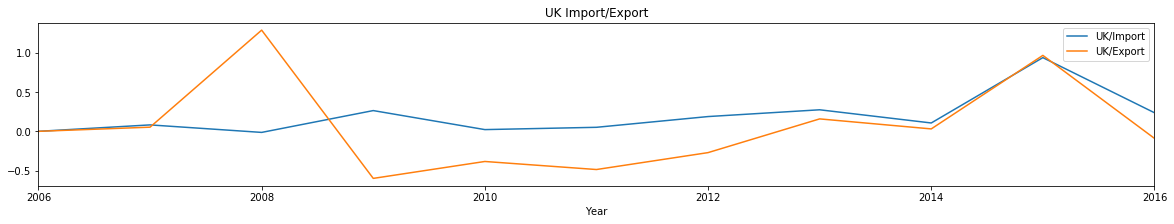

<Figure size 432x288 with 0 Axes>

In [95]:
# graph to show imports/exports for individual country
uk_ImportExport.plot(kind="line", figsize=(20,3))

# Set a title for the chart
plt.title("UK Import/Export")
plt.savefig("../ImportsExportsGraphs/uk_ImportExport.png",bbox_inches="tight")
plt.show()
plt.tight_layout()